## Sul database titanic, effettuiamo le seguenti analisi:

In [18]:
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

conn = pymysql.connect(
    host="epicode-data-pt-mysql.cvetyjye2qbl.eu-central-1.rds.amazonaws.com",
    user="studente_dapt",
    password="Ep1c0d3!!D4t4**4n4lys1s",
    database="Titanic"
)

query = "SELECT * FROM titanic"
df = pd.read_sql(query, conn)

conn.close()

print(df.head())


C:\Users\Jonathan\AppData\Local\Temp\ipykernel_20248\2778311657.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


   PassengerId  PClass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket   Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.25              S   
1  female  38.0      1      0          PC 17599  71.28   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.93              S   
3  female  35.0      1      0            113803  53.10  C123        S   
4    male  35.0      0      0            373450   8.05              S   

   Survived EmbarkDate  
0         0  10-4-1912  
1         1  11-4-1912  
2         1  10-4-1912 

Riusciamo a calcolare quanti ponti c'erano sulla nave (prima lettera dei dati nella colonna Cabin)?

In [19]:
cabine = df["Cabin"].dropna()    # Tolgo i valori nulli nella colonna Cabin
lettere = cabine.str[0]

print("Ponti diversi:", lettere.nunique())
print("Lista ponti:", lettere.unique())

Ponti diversi: 8
Lista ponti: [nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


Visualizzare un grafico con il numero di passeggeri di ogni classe di imbarco (colonna PClass)

<Axes: xlabel='PClass'>

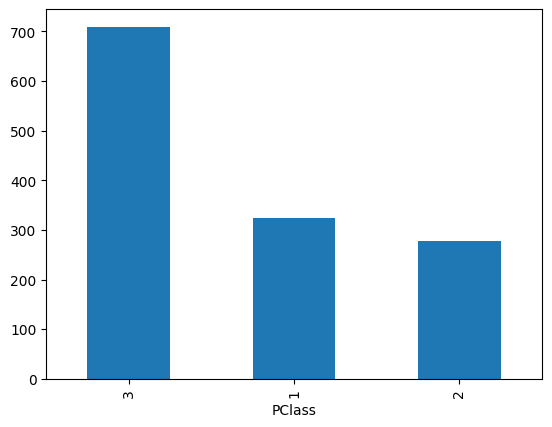

In [20]:
conteggio = df["PClass"].value_counts()

conteggio.plot(kind="bar")


Fare la stessa cosa per la colonna Survived

<Axes: xlabel='Survived'>

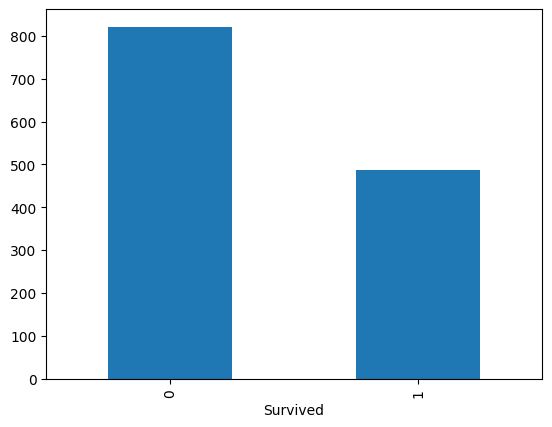

In [21]:
conteggio = df["Survived"].value_counts()

conteggio.plot(kind="bar")

Qual era la distribuzione delle tariffe (Fare)?

<Axes: ylabel='Frequency'>

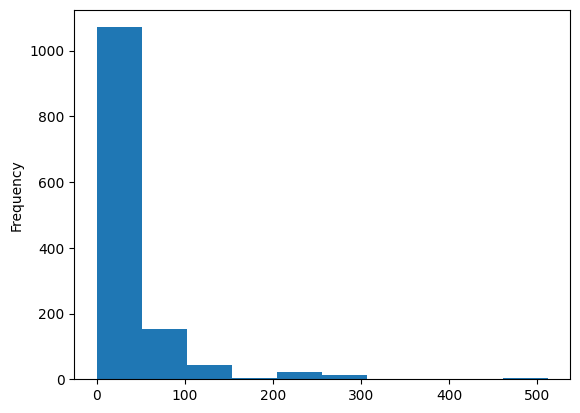

In [22]:
df["Fare"].plot(kind="hist")

Riusciamo a vedere la distribuzione delle età dei passeggeri rispetto alla classe di imbarco con un boxplot?

<Axes: xlabel='PClass', ylabel='Age'>

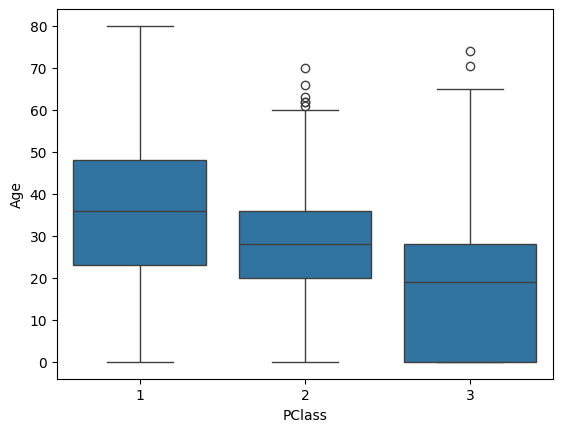

In [23]:
sns.boxplot(data=df, x="PClass", y="Age")

Visualizziamo un boxplot rispetto alle colonne Fare e Survived; che cose ne deduciamo? "Chi è sopravvissuto ha pagato di più"

<Axes: xlabel='Survived', ylabel='Fare'>

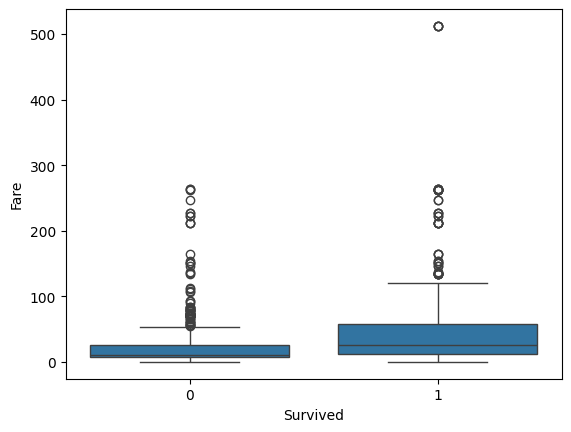

In [8]:
sns.boxplot(data=df, x="Survived", y="Fare")

## Scarichiamo il dataset stockdata.csv da https://github.com/plotly/datasets/blob/master/stockdata.csv e:

In [9]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv"
df = pd.read_csv(url)

df.head()

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09


Visualizziamo l'andamento delle azioni della Apple ("AAPL")

<Axes: >

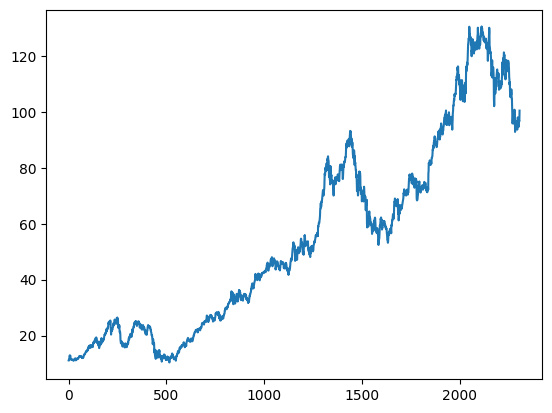

In [10]:
df["AAPL"].plot()

Visualizziamo l'andamento di tutte le azioni del dataset

<Axes: >

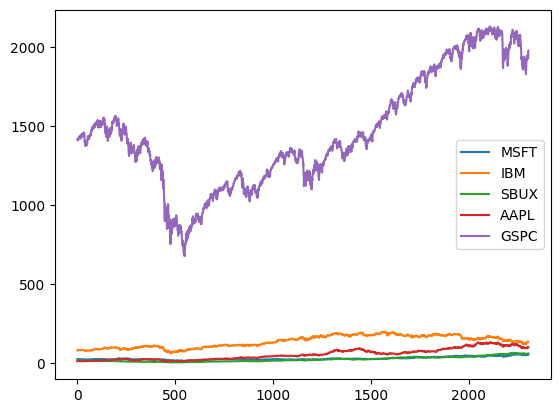

In [11]:
df.plot()

Visualizziamo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013

<Axes: xlabel='Date'>

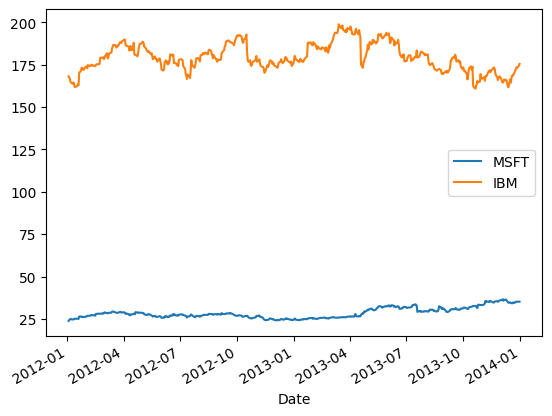

In [13]:
df["Date"] = pd.to_datetime(df["Date"])
df_2012_2013 = df[(df["Date"].dt.year == 2012) | (df["Date"].dt.year == 2013)]
df_plot = df_2012_2013[["Date", "MSFT", "IBM"]]

df_plot = df_plot.set_index("Date")
df_plot.plot()


Con un istogramma, troviamo il range di valori che le azioni di Microsoft hanno assunto più spesso

<Axes: ylabel='Frequency'>

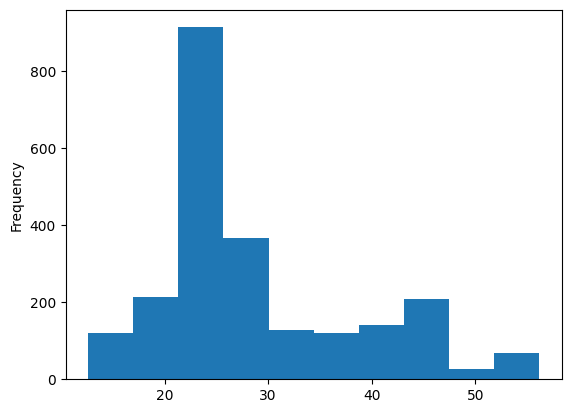

In [14]:
df["MSFT"].plot(kind="hist")

## Scarichiamo il dataset metal_bands_2017.csv dalla piattaforma e:

In [25]:
df = pd.read_csv("metal_bands_2017.csv", encoding="latin1")
df.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


Con Seaborn visualizziamo l'istogramma del numero dei fan delle varie band; cosa si vede? Cose ne deduciamo? "Solo alcune band hanno dei fan"

<Axes: xlabel='fans', ylabel='Count'>

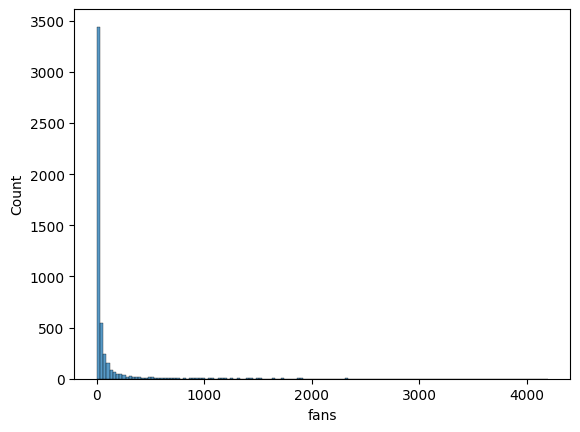

In [26]:
sns.histplot(data=df, x="fans")

Delle band che suonano sia Progressive che Thrash, realizziamo un barplot che mostri quanti fan ci sono in totale rispetto al paese di origine (nota: in questo caso specifico, per accedere alla colonna "style" dovremo usare .loc[:, "style"] e non .style perché quest'ultimo è un metodo)

<Axes: ylabel='origin'>

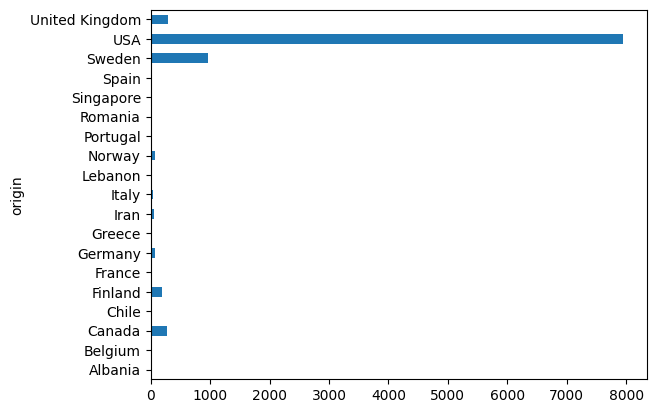

In [27]:
stili = df["style"].str.lower()

filtro = stili.str.contains("progressive") & stili.str.contains("thrash")

df_prog_thrash = df[filtro]

fans_per_paese = df_prog_thrash.groupby("origin")["fans"].sum()

fans_per_paese.plot(kind="barh")



Visualizziamo un istogramma delle date di formazione delle band (potremo dover convertire in qualche modo questo dato); si nota qualche trend?

<Axes: ylabel='Frequency'>

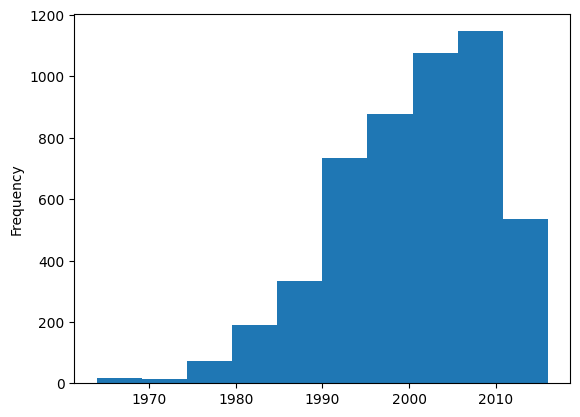

In [29]:
df["formed"] = df["formed"].replace("-", None)
df["formed"] = df["formed"].astype(float)

df["formed"].plot(kind="hist")

## Scarichiamo il dataset elections.csv da https://github.com/plotly/datasets/blob/master/election.csv:

In [12]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/election.csv"
df = pd.read_csv(url)

df.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


Con un grafico a barre confrontiamo i voti totali presi dai tre candidati (come somma di tutti i distretti)

<Axes: >

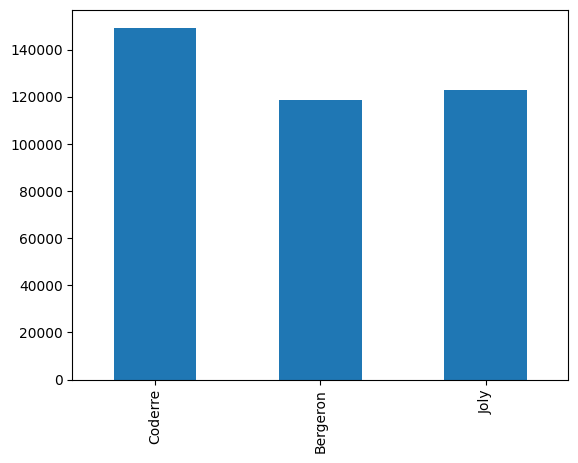

In [22]:
totali = df[["Coderre", "Bergeron", "Joly"]].sum()
totali.plot(kind="bar")

Con un grafico a barre confrontiamo il numero di votanti per i primi dieci distretti

<Axes: >

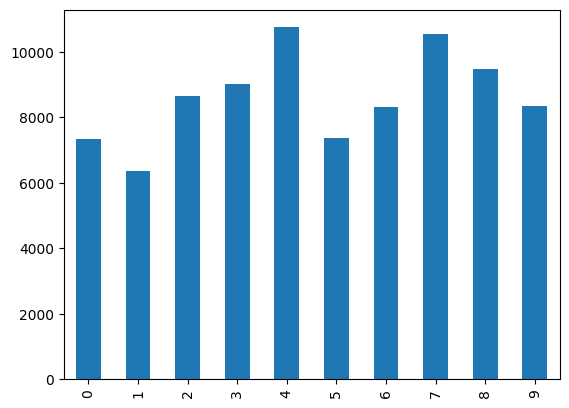

In [23]:
primi_dieci = df[:10]

primi_dieci["total"].plot(kind="bar")

## Scarichiamo i file party_in_nyc.csv dal dataset https://www.kaggle.com/datasets/somesnm/partynyc relativo a quante volte è stata chiamata la polizia per delle feste eccessivamente rumorose:

In [13]:
df = pd.read_csv("party_in_nyc.csv")
df.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


Realizziamo un grafico che mostra quante chiamate ci sono state per ogni città per tutti i tipi di locale

<Axes: xlabel='Borough'>

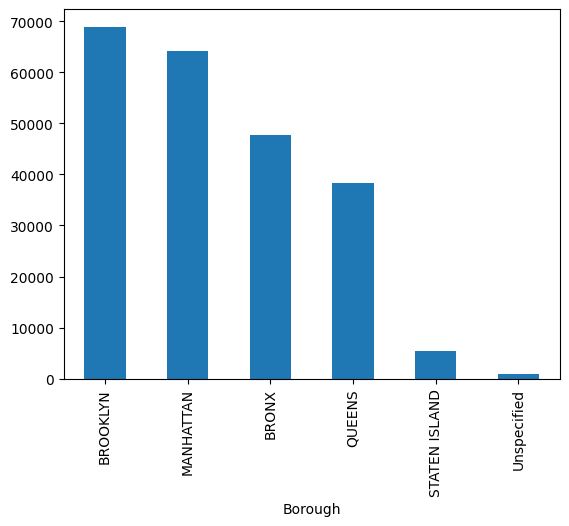

In [26]:
# Conto quante chiamate per ogni borough
conteggio = df["Borough"].value_counts()

conteggio.plot(kind="bar")


Qual è il rettangolo di latitudine e longitudine considerato dal dataset?

In [27]:
lat_min = df["Latitude"].min()
lat_max = df["Latitude"].max()
lon_min = df["Longitude"].min()
lon_max = df["Longitude"].max()

lat_min, lat_max, lon_min, lon_max

(np.float64(40.498819681472185),
 np.float64(40.91217840308113),
 np.float64(-74.25127710072611),
 np.float64(-73.70230256557906))

Quante segnalazioni sono state fatte per case private?

In [28]:
case_private = df[df["Location Type"] == "Residential Building/House"]
len(case_private)

146040

Con Seaborn visualizziamo il conteggio delle segnalazioni avvenute in ogni quartiere; che succede se aggiungiamo il parametro hue="Location Type"?

<Axes: xlabel='Borough', ylabel='count'>

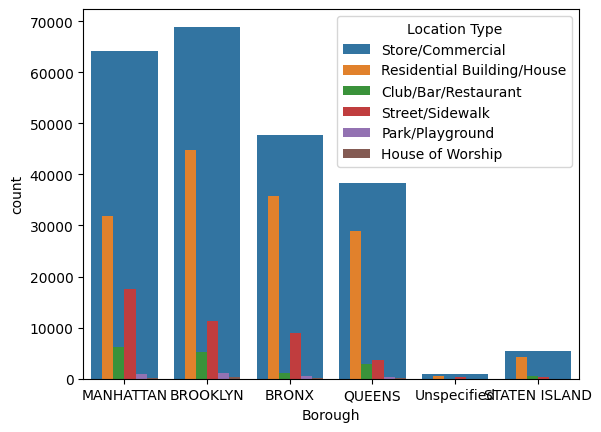

In [14]:
sns.countplot(data=df, x="Borough")
sns.countplot(data=df, x="Borough", hue="Location Type")

Aggiungendo hue="Location Type" il grafico suddivide ogni borough in base al tipo di locale.